In [89]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from helpers.cm26 import DatasetCM26
from helpers.selectors import select_NA, select_Pacific, select_Cem, select_globe, select_ACC, compare, plot
from helpers.operators import Coarsen, Filtering, Subsampling, CoarsenKochkov, CoarsenWeighted
from helpers.plot_helpers import create_animation_ffmpeg

import hvplot.xarray
import hvplot
import cmocean
import os

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Snapshot

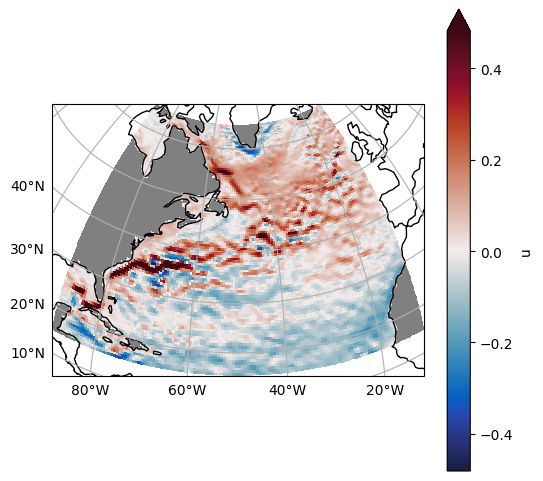

In [2]:
plot(xr.open_dataset(
    '/scratch/pp2681/mom6/CM26_datasets/Gauss-FGR2/factor-6/train-0.nc').u,
     xr.open_dataset(
     '/scratch/pp2681/mom6/CM26_datasets/Gauss-FGR2/factor-6/param.nc').wet_u,
     selector=select_NA
    )

# Zanna Bolton model

In [93]:
ds = DatasetCM26(xr.open_dataset('/scratch/pp2681/mom6/CM26_datasets/Gauss-FGR4/factor-4/train-0.nc'),xr.open_dataset('/scratch/pp2681/mom6/CM26_datasets/Gauss-FGR2/factor-4/param.nc'))

In [94]:
ZB = ds.state.ZB20(VGM='False')

In [95]:
VGM_flux = ds.state.ZB20(VGM='VGM_flux')

In [96]:
VGM_full = ds.state.ZB20(VGM='VGM_full')

Correlation: 0.9639170767802238
Relative Error: 0.23953315615653992
R2 =  0.9276099279522896
R2 max =  0.9279787987470627
Optinal scaling: 0.9804520606994629
Nans [test/control]: [0, 0]


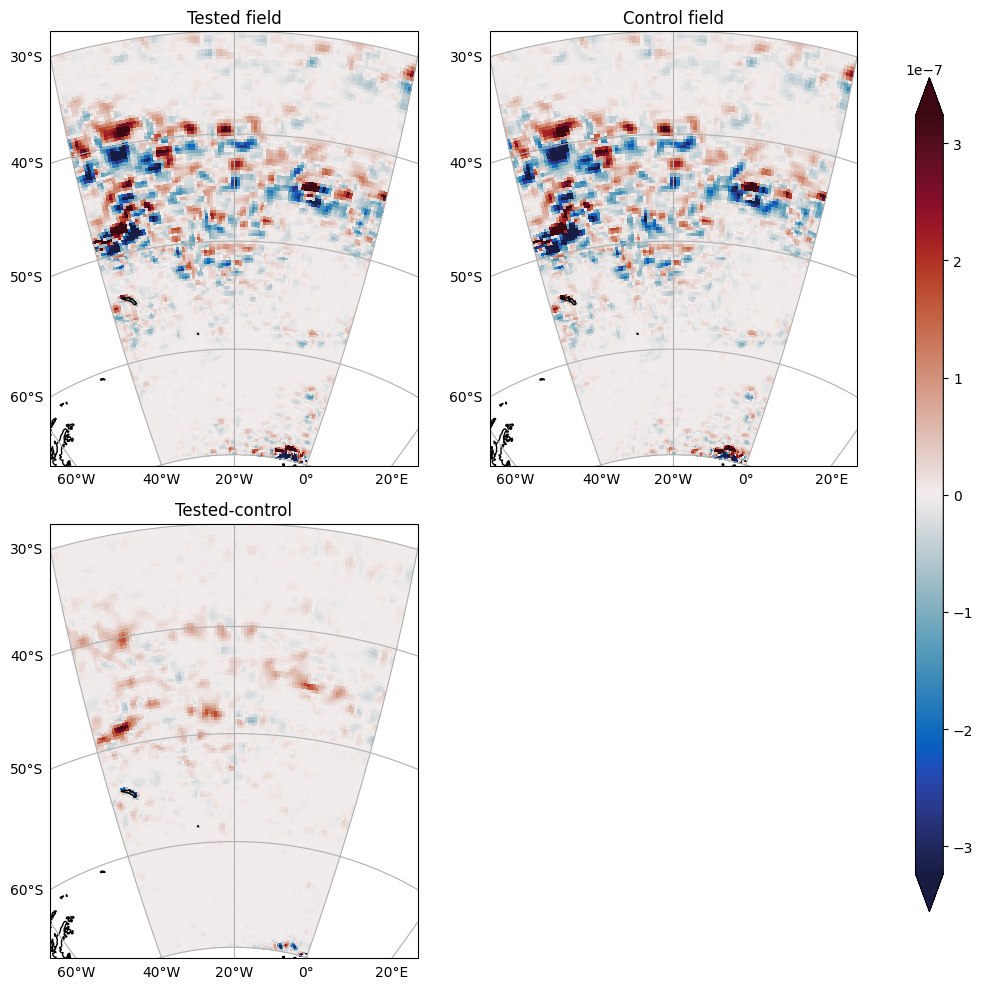

In [97]:
compare(ZB['ZB20v'], VGM_full['ZB20v'], selector=select_ACC)

Correlation: 0.6922770385628318
Relative Error: 0.7439574003219604
R2 =  0.41509246826171875
R2 max =  0.4792451858520508
Optinal scaling: 1.576967716217041
Nans [test/control]: [0, 0]
Correlation: 0.7666883856572762
Relative Error: 0.6943928599357605
R2 =  0.5283292531967163
R2 max =  0.5869058668613434
Optinal scaling: 1.4618184566497803
Nans [test/control]: [0, 0]


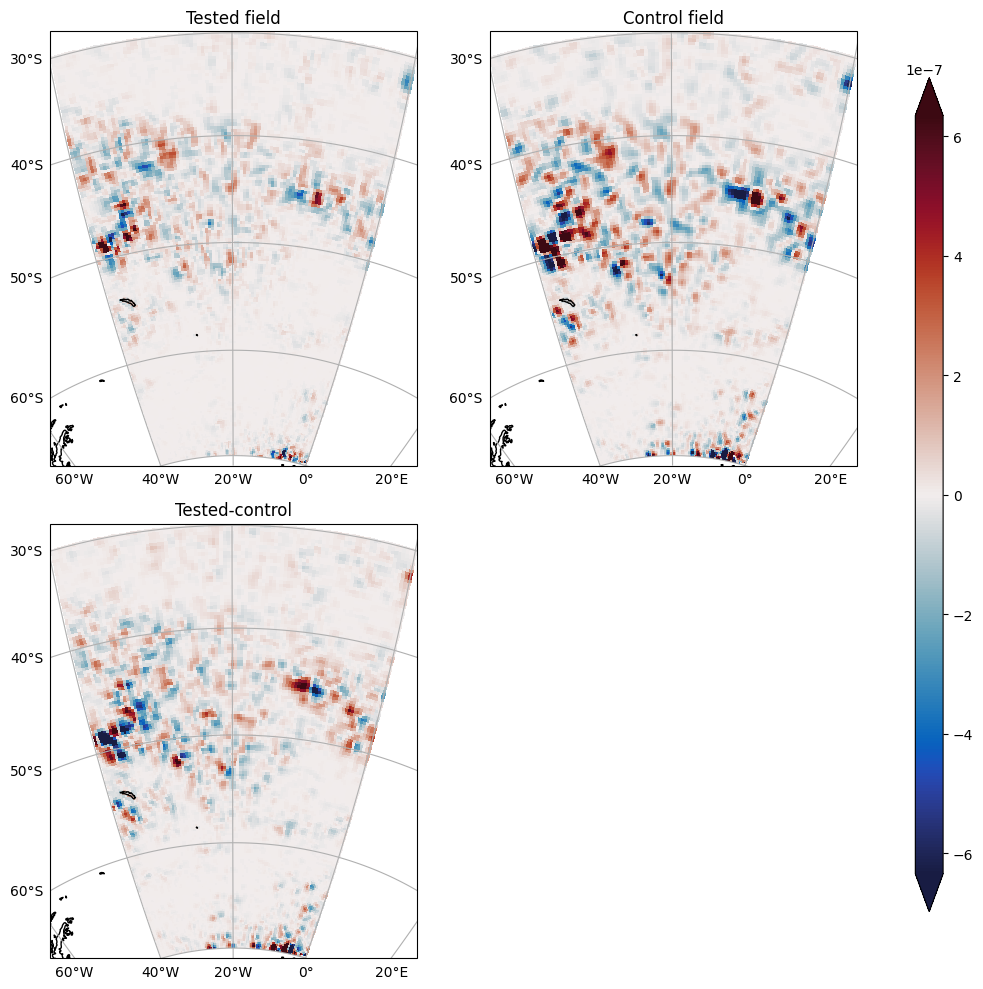

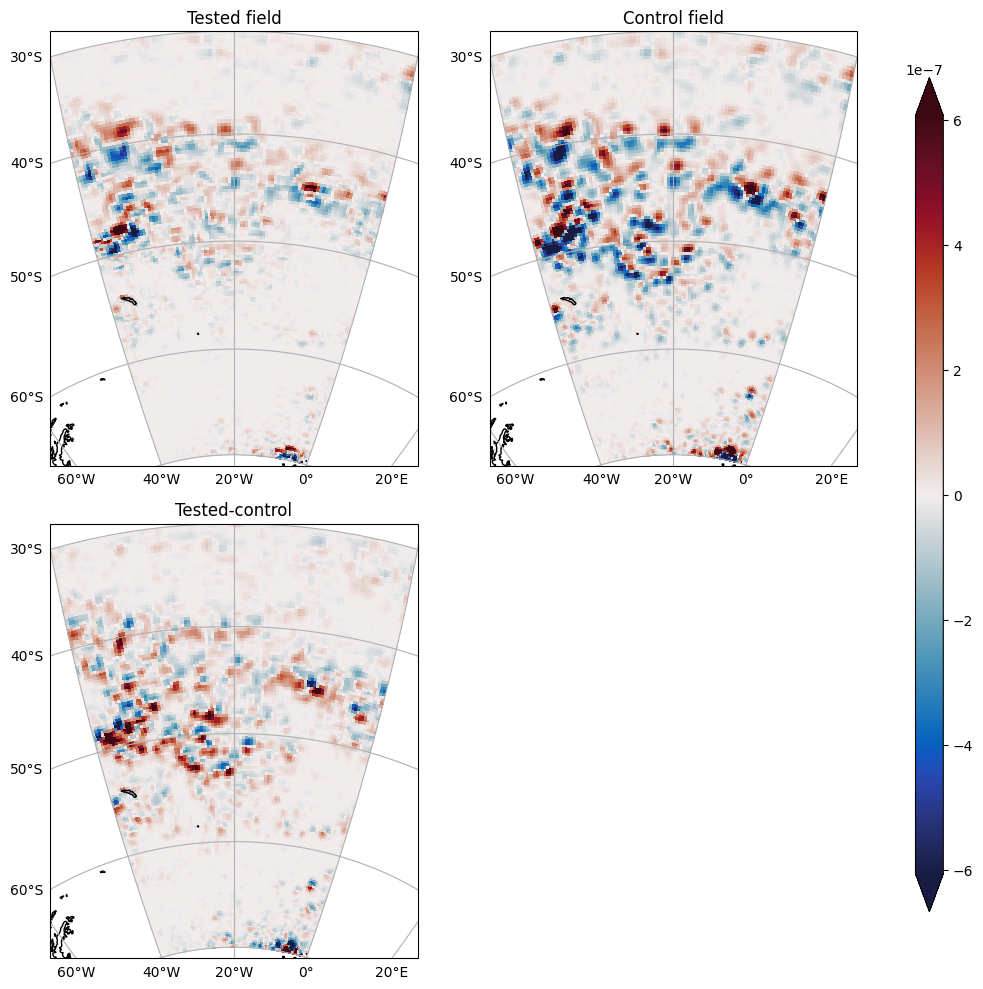

In [98]:
compare(ZB['ZB20u'], ds.data.SGSx, selector=select_ACC)
compare(ZB['ZB20v'], ds.data.SGSy, selector=select_ACC)

Correlation: 0.5764161873995884
Relative Error: 0.7564239501953125
R2 =  0.3318932056427002
R2 max =  0.33225613832473755
Optinal scaling: 1.0341823101043701
Nans [test/control]: [0, 0]
Correlation: 0.7442309652734338
Relative Error: 0.7010127902030945
R2 =  0.5164657831192017
R2 max =  0.5529970824718475
Optinal scaling: 1.345935344696045
Nans [test/control]: [0, 0]


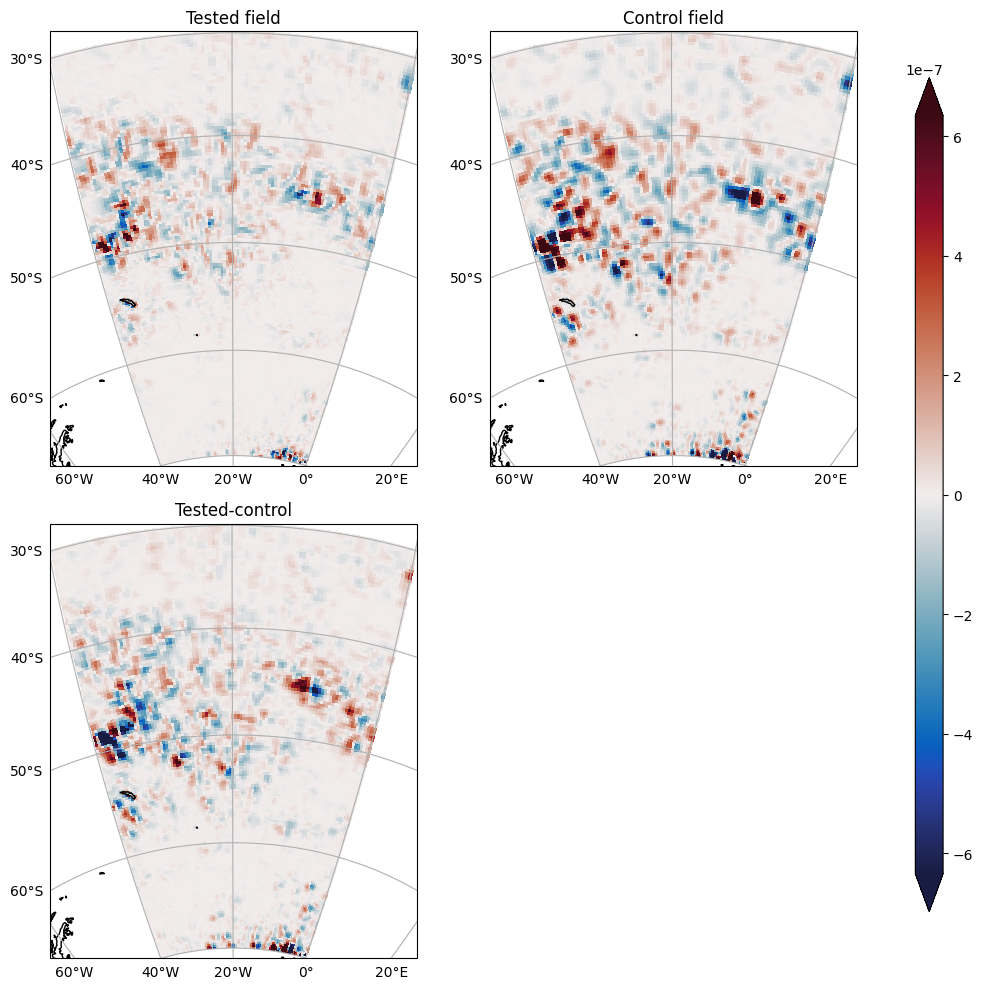

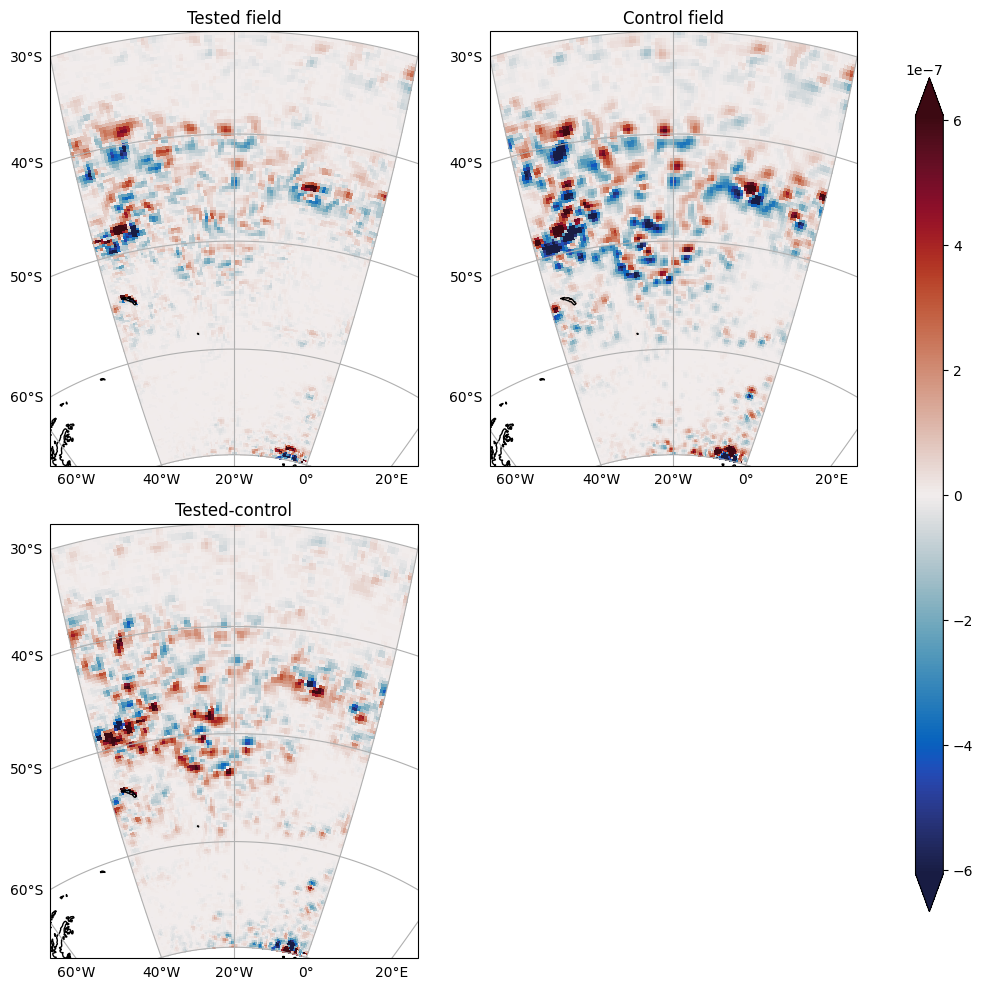

In [99]:
compare(VGM_flux['ZB20u'], ds.data.SGSx, selector=select_ACC)
compare(VGM_flux['ZB20v'], ds.data.SGSy, selector=select_ACC)

Correlation: 0.7025879653087712
Relative Error: 0.7173618078231812
R2 =  0.43716907501220703
R2 max =  0.493594229221344
Optinal scaling: 1.5108132362365723
Nans [test/control]: [0, 0]
Correlation: 0.7977013528493412
Relative Error: 0.666338324546814
R2 =  0.5670517981052399
R2 max =  0.6371991634368896
Optinal scaling: 1.4965438842773438
Nans [test/control]: [0, 0]


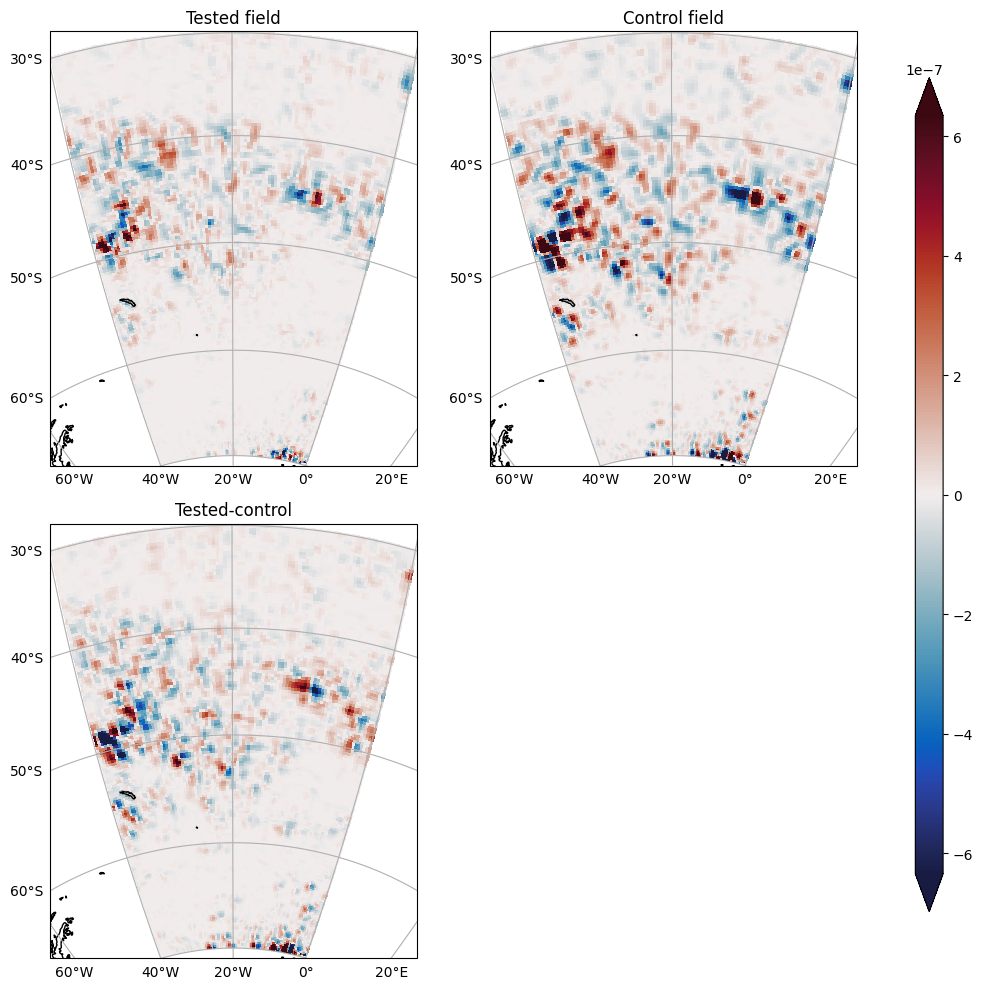

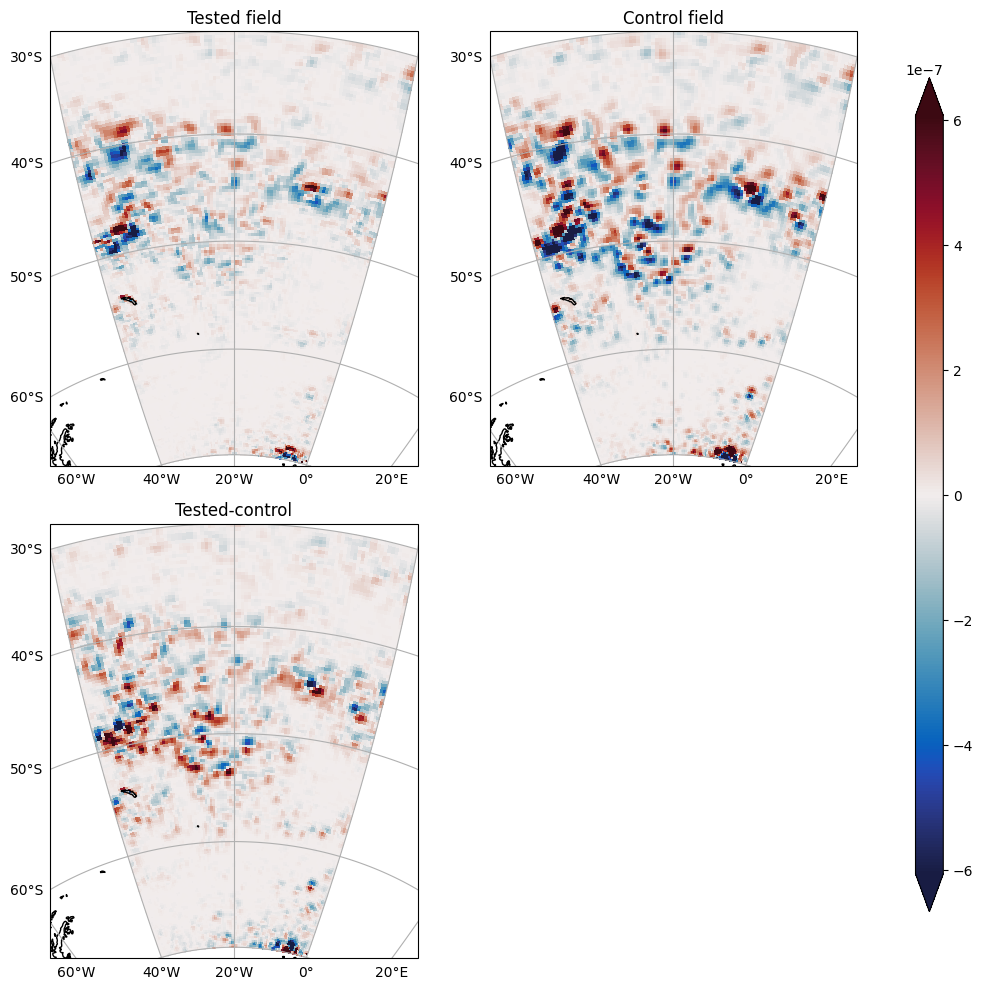

In [100]:
compare(VGM_full['ZB20u'], ds.data.SGSx, selector=select_ACC)
compare(VGM_full['ZB20v'], ds.data.SGSy, selector=select_ACC)